# Section 04 - Approach Trajectory and Entry State

In [1]:
from astropy.time import Time
from AMAT.arrival import Arrival

arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc('JUPITER',
                                      'URANUS',
                                      Time("2035-09-04 00:00:00", scale='tdb'),
                                      Time("2039-05-18 00:00:00", scale='tdb'))

In [2]:
arrival.v_inf_vec

array([-9.62521831, 16.51192666,  7.46493598])

In [3]:
arrival.declination

-48.89326200262988

In [4]:
import numpy as np
from AMAT.approach import Approach

In [8]:
approach1 = Approach("URANUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(25559+260)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=1000e3)

print("Entry altitude, km: "+ str(approach1.h_EI/1e3))
print("Entry longitude BI, deg: "+ str(round(approach1.longitude_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(approach1.latitude_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(approach1.v_entry_atm_mag/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(approach1.heading_entry_atm*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(approach1.gamma_entry_atm*180/np.pi, 4)))

print("Inclination, deg: "+str(approach1.i*180/np.pi))

Entry altitude, km: 1000.0
Entry longitude BI, deg: -15.22
Entry latitude BI, deg: 77.2
Atm. relative entry speed, km/s: 29.2861
Atm. relative heading angle, deg: 88.8349
Atm. relative EFPA, deg: -11.7035
Inclination, deg: 90.0


### Run the following code to generate the approach trajectory plot

The code is also available in the file ```03-uranus-approach-trajectory.py```. 

```
from mayavi import mlab
import numpy as np

from AMAT.approach import Approach

probe1 = Approach("URANUS",
						v_inf_vec_icrf_kms=np.array([-9.62521831, 16.51192666,  7.46493598]),
						rp=(25559+250)*1e3, psi=np.pi,
						is_entrySystem=True, h_EI=1000e3)

theta_star_arr_probe1 = np.linspace(-1.8, probe1.theta_star_entry, 101)
pos_vec_bi_arr_probe1 = probe1.pos_vec_bi(theta_star_arr_probe1)/25559e3


x_arr_probe1 = pos_vec_bi_arr_probe1[0][:]
y_arr_probe1 = pos_vec_bi_arr_probe1[1][:]
z_arr_probe1 = pos_vec_bi_arr_probe1[2][:]



u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1*np.outer(np.cos(u), np.sin(v))
y = 1*np.outer(np.sin(u), np.sin(v))
z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.040381198513972*np.outer(np.cos(u), np.sin(v))
y1 = 1.040381198513972*np.outer(np.sin(u), np.sin(v))
z1 = 1.040381198513972*np.outer(np.ones(np.size(u)), np.cos(v))


x_ring_1 = 1.1*np.cos(u)
y_ring_1 = 1.1*np.sin(u)
z_ring_1 = 0.0*np.cos(u)

x_ring_2 = 1.2*np.cos(u)
y_ring_2 = 1.2*np.sin(u)
z_ring_2 = 0.0*np.cos(u)

mlab.figure(bgcolor=(0,0,0))
s1 = mlab.mesh(x, y, z, color=(0.10,0.55,0.35))
s2 = mlab.mesh(x1, y1, z1, color=(0.2, 0.4, 0.4), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1,1,1), line_width=1, tube_radius=None)
r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1,1,1), line_width=1, tube_radius=None)

p1 = mlab.plot3d(x_arr_probe1, y_arr_probe1, z_arr_probe1, color=(1,0,0), line_width=3, tube_radius=None)

mlab.show()
```

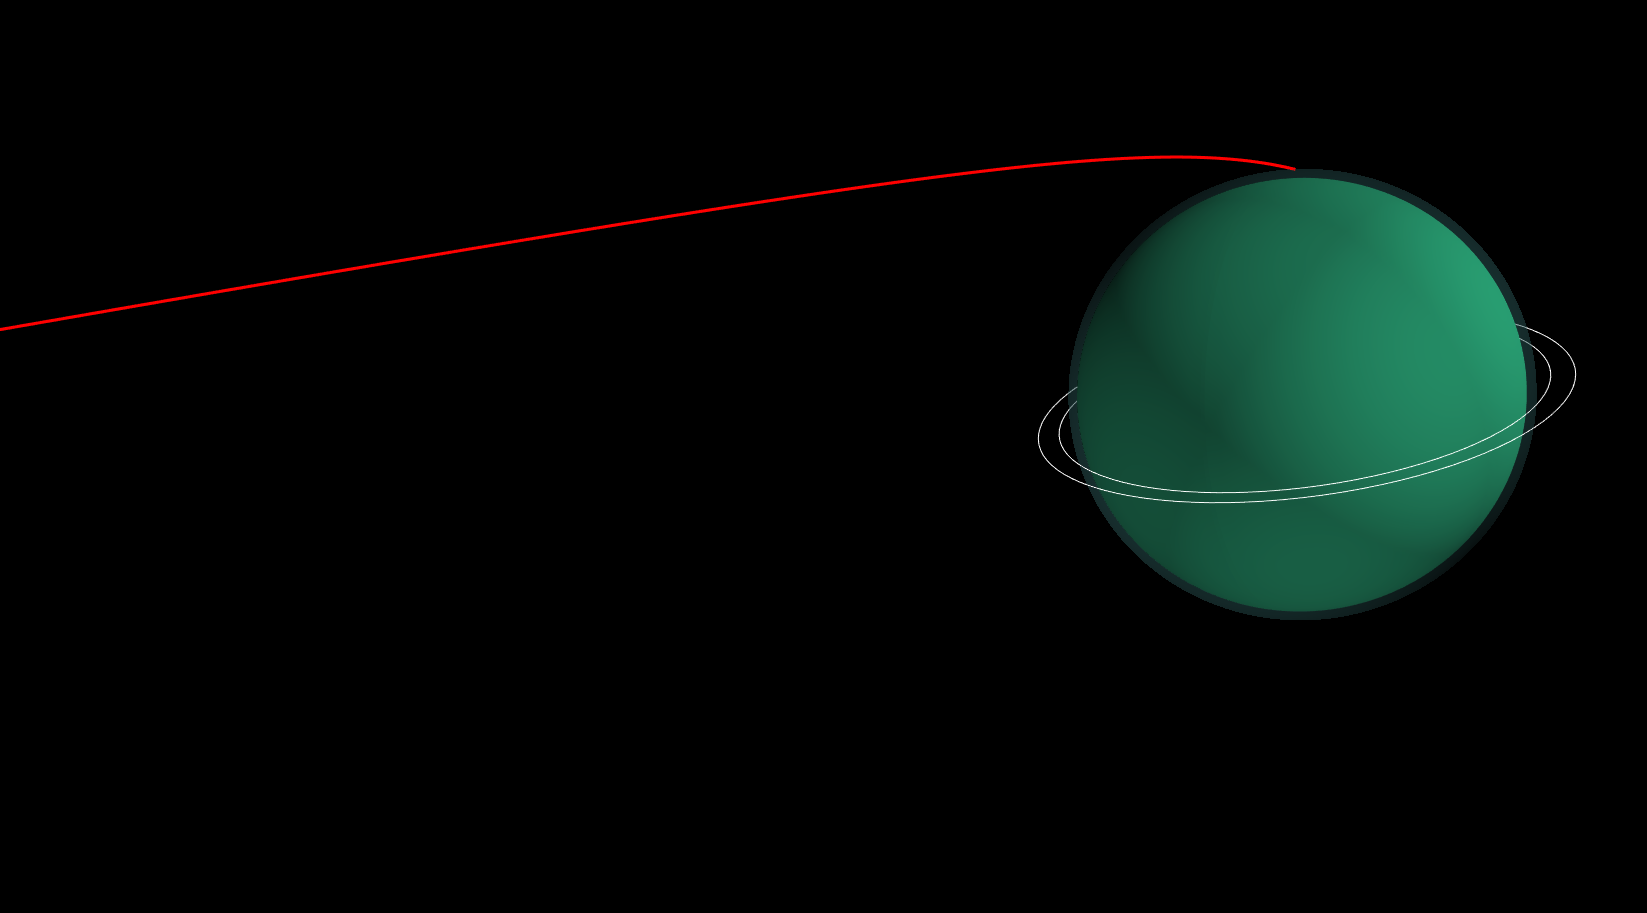

In [1]:
from IPython.display import Image
Image(filename="../../../data/acta-astronautica/uranus-orbiter-probe/uranus-approach-trajectory.png", width=1200)